# Impor library (pustaka)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression, f_classif
from sklearn.preprocessing import RobustScaler
from numpy import array

# Impor data

In [12]:
url = 'https://raw.githubusercontent.com/afiqilyasakmal/european-investment-management/main/data/european-investment-management-train.csv'
df = pd.read_csv(url)
df.head()

,ticker,category,dividend_frequency,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,...,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
0,0P000153IG,Global Flex-Cap Equity,NaN,Value,Large,248.25,10.66,1.00,0.92,6.19,...,14.75,1.85,3.86,8.01,-8.18,-4.63,NaN,16,6,3.0
1,F00000OUR6,US Mid-Cap Equity,Annually,Blend,Medium,124.69,23.06,1.97,1.70,12.07,...,8.64,9.40,6.72,9.26,-6.20,-4.92,9.93,16,7,3.0
2,F00000OTTT,Asia-Pacific ex-Japan Equity,Annually,Growth,Large,322.70,27.99,3.04,2.71,10.35,...,12.53,6.06,7.64,7.34,-10.01,-10.82,9.13,16,7,4.0
3,F000005K32,US Large-Cap Blend Equity,Annually,Value,Large,229.67,17.19,1.77,0.75,6.52,...,8.15,8.10,5.64,7.76,-5.85,-7.07,5.21,17,6,2.0
4,F00000ZCZC,Europe Mid-Cap Equity,NaN,Growth,Medium,111.36,12.15,1.01,0.62,3.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,4,2.0


# Fungsi penting

In [13]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [14]:
def get_missing_info(df):

    missing_values = df.isnull().sum()
    missing_percentage = (df.isnull().sum() / len(df)) * 100

    missing_info = pd.DataFrame({
        'Column': missing_values.index,
        'Missing Values': missing_values.values,
        'Missing Values Percentage': missing_percentage.values
    })

    missing_info = missing_info.sort_values(by='Missing Values Percentage', ascending=False)
    return missing_info

# Data preparation

## Data duplikat

In [15]:
duplikat_train = df[df.duplicated()]
print(duplikat_train)

Empty DataFrame
Columns: [ticker, category, dividend_frequency, equity_style, equity_size, equity_size_score, price_prospective_earnings, price_book_ratio, price_sales_ratio, price_cash_flow_ratio, dividend_yield_factor, long_term_projected_earnings_growth, historical_earnings_growth, sales_growth, cash_flow_growth, book_value_growth, roa, roe, roic, bond_interest_rate_sensitivity, bond_credit_quality, average_coupon_rate, average_credit_quality, modified_duration, effective_maturity, asset_stock, asset_bond, asset_cash, asset_other, sector_basic_materials, sector_consumer_cyclical, sector_financial_services, sector_real_estate, sector_consumer_defensive, sector_healthcare, sector_utilities, sector_communication_services, sector_energy, sector_industrials, sector_technology, market_cap_giant, market_cap_large, market_cap_medium, market_cap_small, market_cap_micro, credit_aaa, credit_aa, credit_a, credit_bbb, credit_bb, credit_b, credit_below_b, credit_not_rated, holdings_n_stock, holdi

Tidak ada data duplikat pada dataset.

## Missing value

In [16]:
# Missing Values
def get_missing_info(df):

    missing_values = df.isnull().sum()
    missing_percentage = (df.isnull().sum() / len(df)) * 100

    missing_info = pd.DataFrame({
        'Column': missing_values.index,
        'Missing Values': missing_values.values,
        'Missing Values Percentage': missing_percentage.values
    })

    missing_info = missing_info.sort_values(by='Missing Values Percentage', ascending=False)
    return missing_info

result_missing_info_train = get_missing_info(df)
print(result_missing_info_train)

                             Column  Missing Values  Missing Values Percentage
23                modified_duration           20692                  92.292596
24               effective_maturity           20529                  91.565566
20              bond_credit_quality           20133                  89.799286
19   bond_interest_rate_sensitivity           20133                  89.799286
52                 credit_not_rated           19897                  88.746655
..                              ...             ...                        ...
10            dividend_yield_factor               0                   0.000000
5                 equity_size_score               0                   0.000000
4                       equity_size               0                   0.000000
3                      equity_style               0                   0.000000
116                          rating               0                   0.000000

[117 rows x 3 columns]


In [17]:
# Tentukan batas persentase missing values yang ingin Anda gunakan (misalnya, 50%)
threshold_percentage = 50

# Pilih kolom-kolom yang memiliki missing values di atas threshold
columns_to_drop_train = result_missing_info_train[result_missing_info_train['Missing Values Percentage'] > threshold_percentage]['Column']

# Drop kolom-kolom tersebut dari DataFrame
df = df.drop(columns=columns_to_drop_train)

Saya merancang missing values threshold sebesar 50% karena data yang hilang di atas 50% sudah kehilangan sebagian besar informasinya. Menyimpan fitur tersebut mungkin hanya akan menambah noise dan tidak memberikan insight untuk membuat model prediktif, sehingga perlu di-drop.

## Identifikasi tipe data

Di langkah selanjutnya, saya akan melakukan imputasi data. Imputasi data berkaitan erat dengan tipe data yang ingin diimputasi.

In [18]:
categorical_col = ['category','equity_size','equity_style','nav_per_share_currency',
                   'shareclass_size_currency','fund_size_currency']

numerical_col = [col for col in df.columns if col not in categorical_col]
numerical_col.remove('ticker')
numerical_col.remove('rating')
print(numerical_col)

['equity_size_score', 'price_prospective_earnings', 'price_book_ratio', 'price_sales_ratio', 'price_cash_flow_ratio', 'dividend_yield_factor', 'long_term_projected_earnings_growth', 'historical_earnings_growth', 'sales_growth', 'cash_flow_growth', 'book_value_growth', 'roa', 'roe', 'roic', 'asset_stock', 'asset_bond', 'asset_cash', 'asset_other', 'sector_basic_materials', 'sector_consumer_cyclical', 'sector_financial_services', 'sector_real_estate', 'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities', 'sector_communication_services', 'sector_energy', 'sector_industrials', 'sector_technology', 'market_cap_giant', 'market_cap_large', 'market_cap_medium', 'market_cap_small', 'market_cap_micro', 'holdings_n_stock', 'ongoing_cost', 'management_fees', 'environmental_score', 'social_score', 'governance_score', 'sustainability_score', 'sustainability_rank', 'sustainability_percentage_rank', 'involvement_abortive_contraceptive', 'involvement_alcohol', 'involvement_animal_testin

Untuk kolom yang bertipe numerik, akan diimputasi menggunakan nilai mean. Sedangkan, untuk kolom yang bertipe kategorikal, akan diimpute menggunakan modus.

In [19]:
# Kolom Numerik
for i in numerical_col:
  mean_value = df[i].mean()
  df[i].fillna(mean_value, inplace=True)

# Kolom Kategorikal
for i in categorical_col:
  mode_value = df[i].mode()[0]
  df[i].fillna(mode_value, inplace=True)

# Tampilkan DataFrame yang telah dibersihkan
result_missing_info = get_missing_info(df)
print(result_missing_info.to_string(index=False))

                             Column  Missing Values  Missing Values Percentage
                             ticker               0                        0.0
                    shareclass_size               0                        0.0
                   fund_return_2015               0                        0.0
                   fund_return_2016               0                        0.0
                   fund_return_2017               0                        0.0
                   fund_return_2018               0                        0.0
                   fund_return_2019               0                        0.0
        fund_trailing_return_5years               0                        0.0
        fund_trailing_return_3years               0                        0.0
           fund_trailing_return_ytd               0                        0.0
                          fund_size               0                        0.0
                 fund_size_currency               0 

## Cek outlier

In [20]:
# Check Outliers
# Variabel untuk outliers
Q3 = df.quantile(0.75)
Q1 = df.quantile(0.25)
IQR = Q3-Q1
Jumlah_Outlier0 = []
pd.set_option('display.max_columns', None)
for col in df.select_dtypes(np.number).columns:
    outliers = ((df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier0.append([col, outliers, outliers/len(df)])

indexOutput0 = list(range(0, len(Jumlah_Outlier0)))

pd.DataFrame(Jumlah_Outlier0, columns=['Column', 'Outlier','persentase'],index=indexOutput0).sort_values(by=['persentase'], ascending = False,ignore_index=True)

<ipython-input-20-863eb6b76263>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-20-863eb6b76263>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)


,Column,Outlier,persentase
0,asset_bond,5384,0.240143
1,asset_stock,4672,0.208385
2,involvement_palm_oil,4446,0.198305
3,fund_return_2015,4118,0.183675
4,asset_other,3848,0.171632
...,...,...,...
88,quarters_down,119,0.005308
89,ongoing_cost,65,0.002899
90,management_fees,61,0.002721
91,market_cap_giant,43,0.001918


## Encoding

Fitur-fitur kategorikal akan di-encode agar dapat *fit* ke model menggunakan metode label encoding.

In [21]:
# Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_train_encoded = df.copy()
for col in categorical_col:
    df_train_encoded[col] = le.fit_transform(df[col])

# Lakukan encoding dengan manual (mapping)
rating_map = {
    1:0,
    2:1,
    3:2,
    4:3,
    5:4
}
df_train_encoded['rating'] = df_train_encoded['rating'].map(rating_map)

## Splitting data

Membagi data untuk ditrain pada model.

In [22]:
# Splitting Data
X = df_train_encoded.drop(["rating","ticker"],axis=1)
y = df_train_encoded["rating"]

# Melakukan splitting terhadap data train dan test (0.2 test_size)
from sklearn.model_selection import train_test_split, KFold, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state = 123)

## Melakukan normalisasi

Normalisasi dilakukan agar range nilai fitur-fitur tidak terlalu lebar.

In [23]:
# Menggunakan RobustScaler pada data pelatihan (kolom numerik)
scaler_numeric = RobustScaler()

scaled_train = X_train.copy()
scaled_test = X_test.copy()

# Looping untuk melakukan Robust Scaling pada setiap kolom numerik
for col in numerical_col:
    # Melakukan Robust Scaling pada kolom numerik
    scaled_train[col+'_scaled'] = scaler_numeric.fit_transform(scaled_train[[col]])
    scaled_test[col+'_scaled'] = scaler_numeric.transform(scaled_test[[col]])

# Hapus kolom numerik asli setelah scaling (opsional)
scaled_train.drop(numerical_col, axis=1, inplace=True)
scaled_test.drop(numerical_col, axis=1, inplace=True)

scaled_train

,category,equity_style,equity_size,nav_per_share_currency,shareclass_size_currency,fund_size_currency,equity_size_score_scaled,price_prospective_earnings_scaled,price_book_ratio_scaled,price_sales_ratio_scaled,price_cash_flow_ratio_scaled,dividend_yield_factor_scaled,long_term_projected_earnings_growth_scaled,historical_earnings_growth_scaled,sales_growth_scaled,cash_flow_growth_scaled,book_value_growth_scaled,roa_scaled,roe_scaled,roic_scaled,asset_stock_scaled,asset_bond_scaled,asset_cash_scaled,asset_other_scaled,sector_basic_materials_scaled,sector_consumer_cyclical_scaled,sector_financial_services_scaled,sector_real_estate_scaled,sector_consumer_defensive_scaled,sector_healthcare_scaled,sector_utilities_scaled,sector_communication_services_scaled,sector_energy_scaled,sector_industrials_scaled,sector_technology_scaled,market_cap_giant_scaled,market_cap_large_scaled,market_cap_medium_scaled,market_cap_small_scaled,market_cap_micro_scaled,holdings_n_stock_scaled,ongoing_cost_scaled,management_fees_scaled,environmental_score_scaled,social_score_scaled,governance_score_scaled,sustainability_score_scaled,sustainability_rank_scaled,sustainability_percentage_rank_scaled,involvement_abortive_contraceptive_scaled,involvement_alcohol_scaled,involvement_animal_testing_scaled,involvement_controversial_weapons_scaled,involvement_gambling_scaled,involvement_gmo_scaled,involvement_military_contracting_scaled,involvement_nuclear_scaled,involvement_palm_oil_scaled,involvement_pesticides_scaled,involvement_small_arms_scaled,involvement_thermal_coal_scaled,involvement_tobacco_scaled,nav_per_share_scaled,shareclass_size_scaled,fund_size_scaled,fund_trailing_return_ytd_scaled,fund_trailing_return_3years_scaled,fund_trailing_return_5years_scaled,fund_return_2019_scaled,fund_return_2018_scaled,fund_return_2017_scaled,fund_return_2016_scaled,fund_return_2015_scaled,fund_return_2020_q3_scaled,fund_return_2020_q2_scaled,fund_return_2020_q1_scaled,fund_return_2019_q4_scaled,fund_return_2019_q3_scaled,fund_return_2019_q2_scaled,fund_return_2019_q1_scaled,fund_return_2018_q4_scaled,fund_return_2018_q3_scaled,fund_return_2018_q2_scaled,fund_return_2018_q1_scaled,fund_return_2017_q4_scaled,fund_return_2017_q3_scaled,fund_return_2017_q2_scaled,fund_return_2017_q1_scaled,fund_return_2016_q4_scaled,fund_return_2016_q3_scaled,fund_return_2016_q2_scaled,fund_return_2016_q1_scaled,fund_return_2015_q4_scaled,fund_return_2015_q3_scaled,fund_return_2015_q2_scaled,fund_return_2015_q1_scaled,quarters_up_scaled,quarters_down_scaled
22204,65,2,0,8,6,6,-0.183915,-0.482168,-0.629921,-0.538462,-0.606822,0.891753,-0.025890,-0.524242,-0.700000,-0.398261,-0.824766,-0.575931,-0.468788,-0.554371,-4.838375,204.444444,2.625369,9.314286,0.218227,-0.403785,0.479072,-0.136103,0.179620,-0.020989,-0.743879,-0.461812,0.731201,0.280292,-0.544788,0.117910,-0.449577,-0.052063,0.772177,1.942446,-0.510897,-0.235294,-0.049580,0.366972,0.360268,0.381150,0.403240,-1.000000,0.682614,0.363894,0.398876,0.246128,0.582418,0.86,0.04,0.443114,0.875000,0.15,3.409091,1.211538,0.524887,1.609524,0.693931,-0.160892,-0.191548,-0.412669,-0.347267,-0.816512,-0.366975,-0.018358,-0.346153,-1.176647,0.453315,-0.162602,-0.500000,-0.162855,0.202632,-0.140449,-0.446133,-0.391129,0.089888,-0.091877,-0.068254,0.067568,-0.063558,-0.594502,0.250018,-0.201878,-0.174766,-0.553827,-0.514899,-1.075558,0.250677,-0.178519,0.506794,0.194131,0.25,0.000000
15730,91,2,0,16,14,12,-0.201367,-0.887304,0.125984,-0.564103,-0.394973,0.396907,-0.372168,0.823232,0.406122,0.718261,-0.315421,1.060172,1.725826,1.149254,0.084326,0.777778,-0.005900,0.000000,-0.032238,-0.209779,-0.391214,-0.690828,0.542314,0.545383,0.179294,-0.463709,-1.434939,-0.762044,0.643175,-0.581643,1.225558,0.602278,-0.211694,0.000000,1.249732,-0.906765,-1.036247,-0.486239,0.456759,-0.207891,-0.632221,0.000000,-0.217386,0.511150,-0.331461,0.582155,0.010989,0.40,0.00,-0.227545,1.755682,0.20,0.000000,0.403846,0.316742,2.180952,-0.372422,0.006351,-0.238101,-0.527361,

## Yeo-Johnson Transform

Untuk mengurangi dampak outliers, salah satu caranya kita bisa melakukan transformasi data dengan metode Yeo-Johnson. Alasan saya menggunakan Yeo-Johnson Transform:

- Data mengandung nilai nol dan nilai negatif
- Lebih tahan dan mampu menangani outliers
- Fleksibel dalam menangani berbagai jenis distribusi data

In [24]:
from sklearn.preprocessing import PowerTransformer

# Membuat objek PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# Looping untuk melakukan Yeo-Johnson Transform pada setiap kolom numerik
for col in numerical_col:
    # Melakukan Yeo-Johnson Transform pada kolom numerik
    col_transformed = pt.fit_transform(scaled_train[[col+'_scaled']])
    scaled_train[col+'_transformed'] = col_transformed

    col_transformed_test = pt.transform(scaled_test[[col+'_scaled']])
    scaled_test[col+'_transformed'] = col_transformed_test

    # Hapus kolom numerik asli setelah scaling (opsional)
    scaled_train.drop(col+'_scaled', axis=1, inplace=True)
    scaled_test.drop(col+'_scaled', axis=1, inplace=True)

scaled_train

,category,equity_style,equity_size,nav_per_share_currency,shareclass_size_currency,fund_size_currency,equity_size_score_transformed,price_prospective_earnings_transformed,price_book_ratio_transformed,price_sales_ratio_transformed,price_cash_flow_ratio_transformed,dividend_yield_factor_transformed,long_term_projected_earnings_growth_transformed,historical_earnings_growth_transformed,sales_growth_transformed,cash_flow_growth_transformed,book_value_growth_transformed,roa_transformed,roe_transformed,roic_transformed,asset_stock_transformed,asset_bond_transformed,asset_cash_transformed,asset_other_transformed,sector_basic_materials_transformed,sector_consumer_cyclical_transformed,sector_financial_services_transformed,sector_real_estate_transformed,sector_consumer_defensive_transformed,sector_healthcare_transformed,sector_utilities_transformed,sector_communication_services_transformed,sector_energy_transformed,sector_industrials_transformed,sector_technology_transformed,market_cap_giant_transformed,market_cap_large_transformed,market_cap_medium_transformed,market_cap_small_transformed,market_cap_micro_transformed,holdings_n_stock_transformed,ongoing_cost_transformed,management_fees_transformed,environmental_score_transformed,social_score_transformed,governance_score_transformed,sustainability_score_transformed,sustainability_rank_transformed,sustainability_percentage_rank_transformed,involvement_abortive_contraceptive_transformed,involvement_alcohol_transformed,involvement_animal_testing_transformed,involvement_controversial_weapons_transformed,involvement_gambling_transformed,involvement_gmo_transformed,involvement_military_contracting_transformed,involvement_nuclear_transformed,involvement_palm_oil_transformed,involvement_pesticides_transformed,involvement_small_arms_transformed,involvement_thermal_coal_transformed,involvement_tobacco_transformed,nav_per_share_transformed,shareclass_size_transformed,fund_size_transformed,fund_trailing_return_ytd_transformed,fund_trailing_return_3years_transformed,fund_trailing_return_5years_transformed,fund_return_2019_transformed,fund_return_2018_transformed,fund_return_2017_transformed,fund_return_2016_transformed,fund_return_2015_transformed,fund_return_2020_q3_transformed,fund_return_2020_q2_transformed,fund_return_2020_q1_transformed,fund_return_2019_q4_transformed,fund_return_2019_q3_transformed,fund_return_2019_q2_transformed,fund_return_2019_q1_transformed,fund_return_2018_q4_transformed,fund_return_2018_q3_transformed,fund_return_2018_q2_transformed,fund_return_2018_q1_transformed,fund_return_2017_q4_transformed,fund_return_2017_q3_transformed,fund_return_2017_q2_transformed,fund_return_2017_q1_transformed,fund_return_2016_q4_transformed,fund_return_2016_q3_transformed,fund_return_2016_q2_transformed,fund_return_2016_q1_transformed,fund_return_2015_q4_transformed,fund_return_2015_q3_transformed,fund_return_2015_q2_transformed,fund_return_2015_q1_transformed,quarters_up_transformed,quarters_down_transformed
22204,65,2,0,8,6,6,-0.195028,-0.636224,-1.238277,-1.120579,-1.047367,0.976059,-0.010743,-0.501761,-0.646932,-0.336015,-0.805466,-0.659561,-0.571031,-0.608710,-1.327431,0.574531,0.794667,1.733714,0.395902,-0.347861,0.445889,-0.179351,0.317371,0.235098,-0.356172,-0.348413,0.801814,0.393485,-0.525286,0.243655,-0.367614,-0.099290,0.790378,0.612506,-2.194375,-0.391262,-0.147206,0.461499,0.368676,0.448339,0.470136,-1.115553,1.052295,0.548962,0.592527,0.404135,0.636716,0.856567,2.399001,0.611406,0.978593,2.577836,1.624325,1.180151,0.762819,1.319425,0.747312,-0.954727,-0.787369,-0.401587,-0.418230,-0.849008,-0.472752,-0.097532,-0.288302,-1.169805,0.192651,-0.212265,-0.562099,-0.215554,0.243291,-0.162957,-0.510771,-0.477349,0.108998,-0.230140,-0.165411,0.092999,-0.041957,-0.716078,0.219523,-0.249098,-0.143394,-0.612109,-0.455458,-0.937026,0.275745,-0.257420,0.505038,0.102940,0.402990,0.148675
15730,91,2,0,16,14,12,-0.214541,-1.431794,0.168431,-1.189135,-0.627187,0.502843,-0.439050,0.735901,0.256

## Feature selection

Selain menetapkan missing values treshold sebesar 50%, saya juga menerapkan `SelectKBest`, dengan k sebanyak 50.

Dengan melakukan *trial and error*, k=50 memiliki running time yang tidak terlalu lama dan akurasi relatif tinggi.

In [25]:
# Feature Selection

select = SelectKBest(score_func=f_classif, k=50)
z = select.fit_transform(scaled_train,y_train)

filter = select.get_support()
selected_features  = array(scaled_train.columns)

# Drop columns from X_train that are not among the selected best 30 features
selected_columns = scaled_train.columns[filter]
X_train_selected = scaled_train[selected_columns]
scaled_test = scaled_test[selected_columns]

X_train_selected

,equity_style,equity_size_score_transformed,price_prospective_earnings_transformed,price_book_ratio_transformed,price_sales_ratio_transformed,price_cash_flow_ratio_transformed,dividend_yield_factor_transformed,long_term_projected_earnings_growth_transformed,historical_earnings_growth_transformed,sales_growth_transformed,book_value_growth_transformed,roa_transformed,roe_transformed,roic_transformed,sector_financial_services_transformed,sector_technology_transformed,market_cap_giant_transformed,market_cap_medium_transformed,market_cap_small_transformed,market_cap_micro_transformed,ongoing_cost_transformed,management_fees_transformed,environmental_score_transformed,sustainability_score_transformed,sustainability_rank_transformed,sustainability_percentage_rank_transformed,involvement_thermal_coal_transformed,shareclass_size_transformed,fund_size_transformed,fund_trailing_return_ytd_transformed,fund_trailing_return_3years_transformed,fund_trailing_return_5years_transformed,fund_return_2019_transformed,fund_return_2018_transformed,fund_return_2017_transformed,fund_return_2015_transformed,fund_return_2020_q3_transformed,fund_return_2020_q2_transformed,fund_return_2020_q1_transformed,fund_return_2019_q3_transformed,fund_return_2019_q2_transformed,fund_return_2019_q1_transformed,fund_return_2018_q2_transformed,fund_return_2018_q1_transformed,fund_return_2017_q4_transformed,fund_return_2017_q2_transformed,fund_return_2017_q1_transformed,fund_return_2015_q4_transformed,quarters_up_transformed,quarters_down_transformed
22204,2,-0.195028,-0.636224,-1.238277,-1.120579,-1.047367,0.976059,-0.010743,-0.501761,-0.646932,-0.805466,-0.659561,-0.571031,-0.608710,0.445889,-0.525286,0.243655,-0.099290,0.790378,0.612506,-0.391262,-0.147206,0.461499,0.470136,-1.115553,1.052295,0.762819,-0.954727,-0.787369,-0.401587,-0.418230,-0.849008,-0.472752,-0.097532,-0.288302,0.192651,-0.212265,-0.562099,-0.215554,-0.162957,-0.510771,-0.477349,-0.165411,0.092999,-0.041957,0.219523,-0.249098,0.275745,0.402990,0.148675
15730,2,-0.214541,-1.431794,0.168431,-1.189135,-0.627187,0.502843,-0.439050,0.735901,0.256884,-0.388012,1.552169,2.260816,1.383762,-0.226750,0.813816,-0.718490,0.625914,-0.793630,-0.496514,-1.653036,-1.714451,-0.136653,-0.516969,-0.148927,-0.300546,0.535406,-0.372702,-0.959308,-0.524048,-0.496092,0.039521,-0.812284,0.172916,0.083798,-0.082921,-0.449946,-0.600896,0.071297,0.849995,-1.178208,-0.758148,0.020099,0.135824,0.644168,-0.038246,0.079418,-0.002555,-1.530246,-1.320764
18872,1,0.686147,0.317596,1.042710,0.599422,0.873703,-1.614154,0.896137,0.576965,0.007110,1.218634,-0.072756,0.061825,-0.743687,-0.643711,-1.656591,0.442834,-1.310930,-0.932188,-0.496514,0.008243,0.335592,-1.103442,-0.058666,-1.115553,0.981227,-1.071961,-0.876001,1.154249,0.502673,0.987561,0.997135,0.785836,1.208978,-0.085176,-0.082921,0.062191,-0.320860,0.643083,0.943075,0.467387,0.519269,0.923126,-0.740355,-1.203121,1.014600,0.417018,0.808701,0.402990,-0.339331
4055,1,-1.443478,1.509817,1.108159,0.566174,0.725091,-0.857162,1.573355,0.158584,0.475012,1.218634,-0.104225,0.126117,-0.148141,-0.895924,0.176051,-1.645793,2.505734,1.341918,0.299252,-0.210971,-0.127918,-0.852404,-0.142761,-0.148927,-0.220471,-1.071961,0.791526,1.221920,0.795353,0.729652,1.165173,0.822980,-0.076610,0.083798,-0.082921,1.474640,1.279121,-0.267540,-1.418321,1.461811,0.458153,0.344828,0.890227,0.190447,2.806022,1.015109,1.712659,1.008875,-0.339331
9924,1,2.156631,0.806681,0.995343,1.036093,0.876802,-1.273660,0.929546,0.852404,1.311832,2.101516,0.838118,0.499779,1.362937,1.244508,-0.491726,2.003703,-1.459664,-0.983463,-0.496514,1.162794,1.183316,0.338410,0.620994,-0.148927,0.472170,-1.071961,0.610547,0.477952,0.569478,0.185569,1.006730,-0.592820,0.034265,1.746496,-0.448195,0.751366,0.311973,-0.035608,-0.887761,-0.219046,0.265622,-0.635165,0.322550,1.356943,0.866065,1.420775,0.147023,-0.449709,1.118168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

## Imbalance Handling

Setelah memperhatikan dataset lebih jauh, ternyata terdapat imbalance data.

Untuk mengatasi permasalahan imbalance data, kita bisa pakai metode Borderline SMOTE. Borderline-SMOTE merupakan metode oversampling (menambahkan dataset baru pada kelas minoritas) yang menyeimbangkan data. Borderline SMOTE mempertahankan struktur data asli dengan lebih baik.

In [26]:
# Menghitung jumlah setiap kelas pada set pelatihan
unique_classes, class_counts = np.unique(y_train, return_counts=True)

# Menampilkan jumlah kelas
for cls, count in zip(unique_classes, class_counts):
    print(f'Class {cls}: {count} samples')

Class 0: 1094 samples
Class 1: 3310 samples
Class 2: 6581 samples
Class 3: 4673 samples
Class 4: 2278 samples


In [27]:
# Inisiasi oversampler dengan metode Borderline SMOTE
borderline_smote = BorderlineSMOTE()

# Melakukan resampling
X_borderline_smote, y_borderline_smote = borderline_smote.fit_resample(X_train_selected, y_train)

# Melihat distribusi kelas pada dataset
counter_y_borderline_smote = Counter(y_borderline_smote)
print(counter_y_borderline_smote)

Counter({1: 6581, 2: 6581, 3: 6581, 4: 6581, 0: 6581})


# Membangun model

## XGBoost

In [28]:
import xgboost as xgb

# Inisialisasi model XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=200, max_depth=8,min_child_weight=5,subsample=1)
xgb_model.fit(X_borderline_smote, y_borderline_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [29]:
from sklearn.metrics import classification_report

y_pred_resampled = xgb_model.predict(scaled_test)
evaluate_classifier_performance(y_pred_resampled, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       274
           1       0.82      0.79      0.81       828
           2       0.83      0.85      0.84      1645
           3       0.82      0.80      0.81      1168
           4       0.86      0.85      0.85       569

    accuracy                           0.83      4484
   macro avg       0.83      0.82      0.83      4484
weighted avg       0.83      0.83      0.83      4484



Confusion Matrix



prediction,0,1,2,3,4
actual,,,,,
0,225,30,17,2,0
1,44,657,116,9,2
2,6,105,1401,129,4
3,3,5,146,939,75
4,1,4,14,65,485




Accuracy Average: 0.8267172167707404
F1 Macro Average: 0.8252911491913618
F1 Micro Average: 0.8267172167707404
Precision Macro Average: 0.8262815173872751
Precision Micro Average: 0.8267172167707404
Recall Macro Average: 0.8245257632496426
Recall Micro Average: 0.8267172167707404



## Decision tree

In [30]:
# Membuat model decision tree
dtr_model = DecisionTreeClassifier()
dtr_model.fit(X_borderline_smote, y_borderline_smote)

DecisionTreeClassifier()

In [31]:
# Memprediksi data testing
y_pred = dtr_model.predict(scaled_test)

# Menampilkan metrics evaluasi
evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.66      0.72      0.69       274
           1       0.68      0.71      0.70       828
           2       0.76      0.72      0.74      1645
           3       0.69      0.70      0.70      1168
           4       0.70      0.74      0.72       569

    accuracy                           0.71      4484
   macro avg       0.70      0.72      0.71      4484
weighted avg       0.72      0.71      0.72      4484



Confusion Matrix



prediction,0,1,2,3,4
actual,,,,,
0,196,51,19,8,0
1,59,589,134,32,14
2,33,165,1181,222,44
3,4,38,188,818,120
4,3,18,22,105,421




Accuracy Average: 0.7147636039250669
F1 Macro Average: 0.7086452288545817
F1 Micro Average: 0.7147636039250669
Precision Macro Average: 0.7013049688521978
Precision Micro Average: 0.7147636039250669
Recall Macro Average: 0.7169702544911942
Recall Micro Average: 0.7147636039250669



## Random forest

In [32]:
# Membuat model random forest dengan param
rf_model = RandomForestClassifier(criterion='entropy', max_depth=None, n_estimators=300, min_samples_split=2)
rf_model.fit(X_borderline_smote, y_borderline_smote)

RandomForestClassifier(criterion='entropy', n_estimators=300)

In [33]:
# Memprediksi data testing
predicted_rf = rf_model.predict(scaled_test)

# Menampilkan metrics evaluasi
evaluate_classifier_performance(predicted_rf, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       274
           1       0.79      0.80      0.79       828
           2       0.83      0.82      0.83      1645
           3       0.80      0.81      0.80      1168
           4       0.86      0.86      0.86       569

    accuracy                           0.82      4484
   macro avg       0.82      0.82      0.82      4484
weighted avg       0.82      0.82      0.82      4484



Confusion Matrix



prediction,0,1,2,3,4
actual,,,,,
0,224,35,15,0,0
1,54,659,105,9,1
2,3,130,1356,151,5
3,0,6,144,942,76
4,0,2,5,75,487




Accuracy Average: 0.8180196253345228
F1 Macro Average: 0.8179679889628886
F1 Micro Average: 0.8180196253345228
Precision Macro Average: 0.8159818480204125
Precision Micro Average: 0.8180196253345228
Recall Macro Average: 0.8200244897375745
Recall Micro Average: 0.8180196253345228



## K-Nearest Neighbor

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_borderline_smote, y_borderline_smote)
knn_predicted = knn_classifier.predict(scaled_test)
evaluate_classifier_performance(knn_predicted, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.67      0.80      0.73       274
           1       0.63      0.75      0.69       828
           2       0.79      0.63      0.70      1645
           3       0.70      0.72      0.71      1168
           4       0.72      0.84      0.78       569

    accuracy                           0.71      4484
   macro avg       0.70      0.75      0.72      4484
weighted avg       0.72      0.71      0.71      4484



Confusion Matrix



prediction,0,1,2,3,4
actual,,,,,
0,218,40,10,3,3
1,86,620,95,18,9
2,20,277,1038,273,37
3,3,36,148,846,135
4,0,4,16,72,477




Accuracy Average: 0.7134255129348795
F1 Macro Average: 0.7204448676999083
F1 Micro Average: 0.7134255129348795
Precision Macro Average: 0.7030202429337828
Precision Micro Average: 0.7134255129348795
Recall Macro Average: 0.7476087292039834
Recall Micro Average: 0.7134255129348795



## Cross-validation

In [35]:
from sklearn.model_selection import cross_val_score, KFold

# Define the models
models = [
    ('XGBoost', xgb.XGBClassifier(n_estimators=200, max_depth=8, min_child_weight=5, subsample=1)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(criterion='entropy', max_depth=None, n_estimators=300, min_samples_split=2)),
    ('KNN', KNeighborsClassifier()),
]

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

model_names = []
mean_accuracies = []

for name, model in models:
    cross_val_result = cross_val_score(model, X_borderline_smote, y_borderline_smote, cv=k_fold, scoring='accuracy')
    mean_accuracy = cross_val_result.mean()

    model_names.append(name)
    mean_accuracies.append(mean_accuracy)

    print(f'{name} - Cross-Validation result: {cross_val_result}')
    print(f'{name} - Mean Accuracy: {mean_accuracy}')
    print()

XGBoost - Cross-Validation result: [0.90396596 0.91171554 0.90852454 0.91004407 0.91201945]
XGBoost - Mean Accuracy: 0.909253912779213

Decision Tree - Cross-Validation result: [0.79699134 0.80808388 0.79623158 0.79683939 0.79577572]
Decision Tree - Mean Accuracy: 0.7987843792736666

Random Forest - Cross-Validation result: [0.9032062  0.91110773 0.90791673 0.90457377 0.90548549]
Random Forest - Mean Accuracy: 0.9064579851086461

KNN - Cross-Validation result: [0.83285215 0.84212126 0.83634706 0.84151345 0.83528339]
KNN - Mean Accuracy: 0.8376234614800182



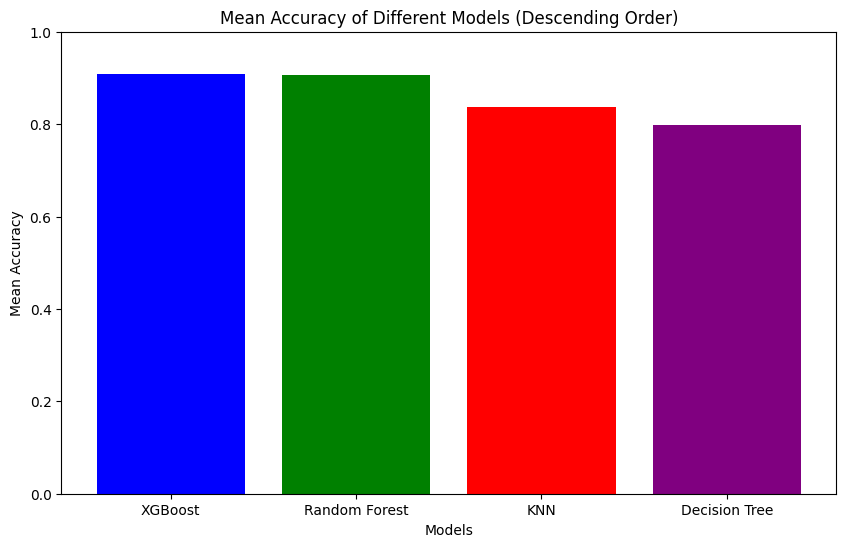

In [36]:
sorted_data = sorted(zip(mean_accuracies, model_names), reverse=True)
mean_accuracies, model_names = zip(*sorted_data)

plt.figure(figsize=(10, 6))
plt.bar(model_names, mean_accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.title('Mean Accuracy of Different Models (Descending Order)')
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to better visualize differences
plt.show()

# Analisis klasifikasi rating

Dalam *machine learning*, dikenal istilah *no free lunch theorem*, di mana kita tidak tau model apa yang paling tepat untuk spesifik kasus tertentu. Oleh karenanya, dilakukan percobaan berbagai macam model untuk dicari model mana yang paling bagus untuk memprediksi *behavior* dataset.

Berdasarkan hasil perbandingan keempat model di atas, model yang tahan terhadap outliers seperti XGBoost dan Random Forest memiliki akurasi yang relatif lebih tinggi. Sedangkan model yang sensitif terhadap outliers seperti KNN memiliki akurasi yang relatif rendah.

XGBoost memiliki rerata akurasi di angka 90%-91%, diikuti Random Forest dengan angka yang sedikit lebih rendah, kemudian K-nearest neighbor dengan rerata akurasi 83%, terakhir decision tree dengan angka 79%.